In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

**Linear Regression**

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables.

In [ ]:
df=pd.read_csv('/content/advertising.csv')
x_train=df['TV']
y_train=df['Sales']

**Problem Statement**

We want to predict sales amount based on mone spent on TV advertisement.

In [ ]:
x_train.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
y_train.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [ ]:
learningRate=.00001
epochs=3000

In [ ]:
# Disable eager execution
tf.compat.v1.disable_eager_execution()


# Define input tensors

X = tf.placeholder(tf.float32)  # Input for x_train
Y = tf.placeholder(tf.float32)  # Input for y_train

In [ ]:
W=tf.Variable(np.random.randn(),'slope')
B=tf.Variable(np.random.randn(),'intercept')

In [ ]:
slopeArray=[]
interceptArray=[]
costArray=[]

In [ ]:
prediction=W*X+B

In [ ]:
cost=tf.reduce_mean(tf.square(prediction-Y))

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learningRate).minimize(cost)

In [ ]:
init=tf.global_variables_initializer()

In [ ]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
      for (x,y) in zip(x_train,y_train):
        sess.run(optimizer,feed_dict={X:x_train,Y:y_train})
      W1=sess.run(W)
      slopeArray.append(W1)
      B1=sess.run(B)
      interceptArray.append(B1)
      cost1=sess.run(cost,feed_dict={X:x_train,Y:y_train})
      costArray.append(cost1)

    slope=sess.run(W)
    intercept=sess.run(B)
    print(slope,intercept)

0.056676745 6.7361617


<Axes: xlabel='TV', ylabel='Sales'>

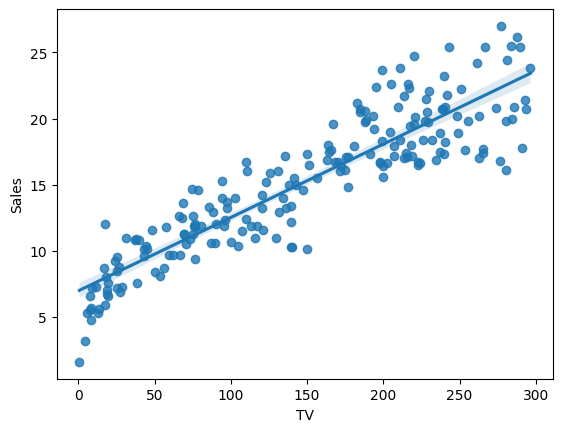

In [ ]:
sns.regplot(x=x_train,y=y_train)

Linear regression fits a line through the data. That line gives us future predictions based on the values of the independent varaible.

**How do we choose that line?**

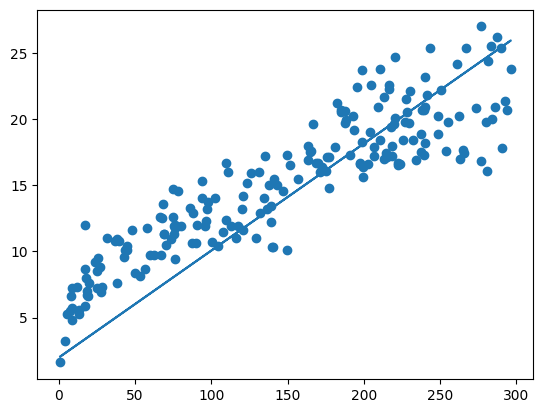

In [ ]:
line1=slopeArray[0]*x_train+interceptArray[0]
plt.scatter(x_train,y_train)
plt.plot(x_train,line1)

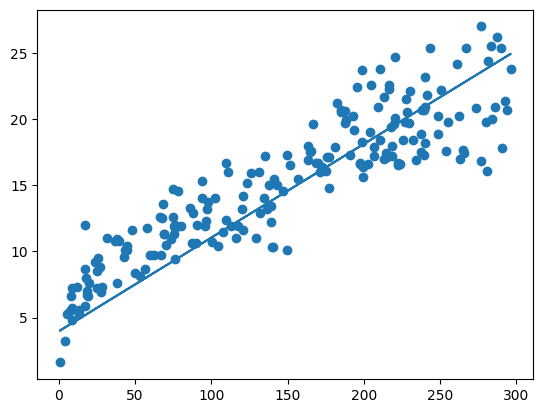

In [ ]:
line2=slopeArray[500]*x_train+interceptArray[500]
plt.scatter(x_train,y_train)
plt.plot(x_train,line2)

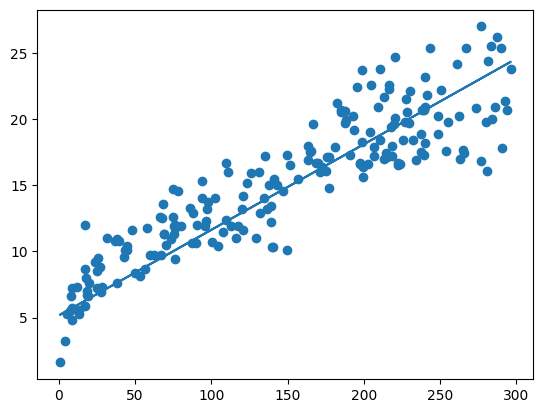

In [ ]:
line3=slopeArray[1000]*x_train+interceptArray[1000]
plt.scatter(x_train,y_train)
plt.plot(x_train,line3)

**How do we choose that line?**

We choose a line with the best prediction.

**Which line gives us the best prediction?**

The line that has the minimum vertical distance from the data points.



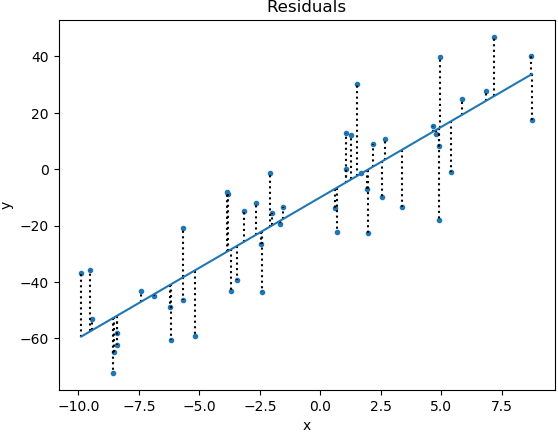

**How do we calculate the vertical distance?**

By simply taking the difference between the original sales value and the predicted sales value by the line. These differences are called **Residuals** .

In [ ]:
pred=slope*x_train+intercept

In [ ]:
x_train[0]

230.1

In [ ]:
y_train[0]

22.1

In [ ]:
pred[0]

19.77748082876205

In [ ]:
diff=y_train-pred
diff

,0
0,2.322519
1,1.141723
2,4.288998
3,1.177311
4,0.916683
...,...
195,-1.301213
196,1.924889
197,-1.967946
198,2.690313


In [ ]:
sumDiff=diff.sum()
sumDiff

12.08959070444102

Summing the residuals are not appropriate. The residuals of the points above the line will cancel out the residuals of the points below the line. Informations will be lost.

In [ ]:
sr=(y_train-pred)**2
sr

,0
0,5.394095
1,1.303532
2,18.395506
3,1.386062
4,0.840307
...,...
195,1.693156
196,3.705197
197,3.872810
198,7.237786


In [ ]:
ssr=sr.sum()
ssr

1046.434156504152

Sum of squared residuals (**SSR**) is the appropriate measure. The line with the minimum SSR value is what we are looking for.

**How do we find the line with the minimum SSR?**

We find the optimal line through **Gradient Descent**.

**What is Gradient Descent?**

**Gradient descent** is an **iterative solution** that incrementally steps toward an optimal solution. Finds the optimal values of parameters that determine the minimum or maximum point of a function.

**What is the equation of a regression line**

The equation of a straight line.

Y = mX + b

where

m = slope

b = intercept

For our problem statement,

**Sales Prediction = Intercept + Slope * TV**


Gradient descent will try to find the optimal slope and intercept for the data. The optimal slope and intercept will form a line which will have the minimum value of SSR.

**Cost/Loss Function**

The term cost/loss function refers to anything we want to optimize when we are trying to fit a model. In this case, sum of squared residuals (SSR).

For our problem statement,

**(SUM(Sales Amount - Sales Prediction)^2)**

**How does this gradient descent work?**

<Axes: xlabel='TV', ylabel='Sales'>

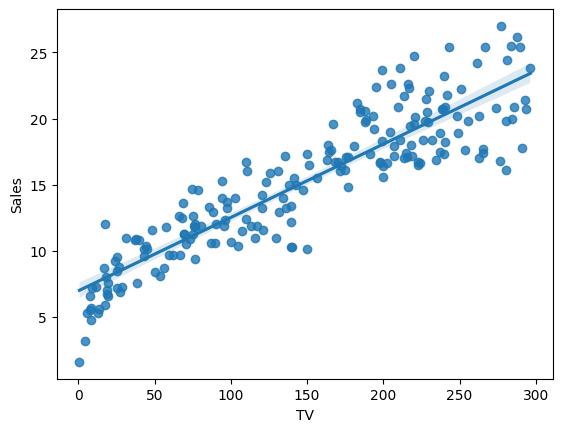

In [ ]:
sns.regplot(x=x_train,y=y_train)

Wouldn't it be great if we had infinite computational power? We could choose a large amount of intercept and slopes and their combinations. These combinations would give us large number of SSR values. We could just select the line with the minimum SSR value and fit it as the regression line.

**Gradient Descent** will do the same but in a more efficient way.

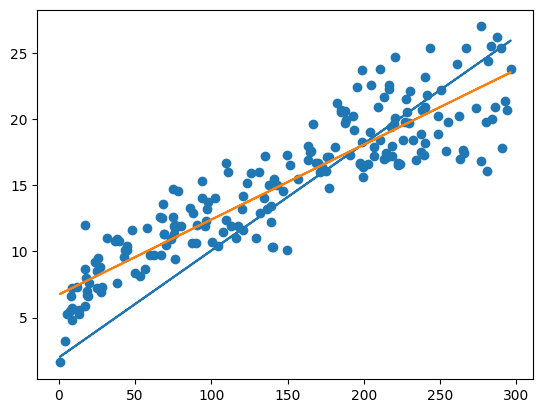

In [ ]:
initial=slopeArray[0]*x_train+interceptArray[0]
plt.scatter(x_train,y_train)
plt.plot(x_train,initial)
plt.plot(x_train,pred)

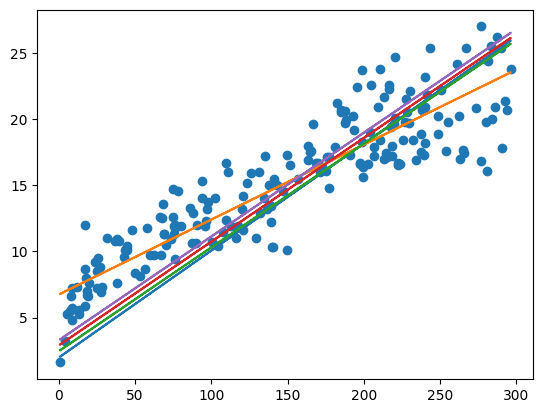

In [ ]:
initial=slopeArray[0]*x_train+interceptArray[0]
plt.scatter(x_train,y_train)
plt.plot(x_train,initial)
plt.plot(x_train,pred)
plt.plot(x_train,slopeArray[100]*x_train+interceptArray[100])
plt.plot(x_train,slopeArray[100]*x_train+interceptArray[200])
plt.plot(x_train,slopeArray[100]*x_train+interceptArray[300])

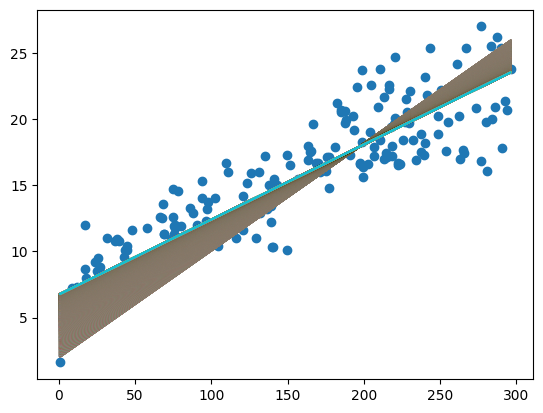

In [ ]:
for i in range(len(slopeArray)):
  plt.plot(x_train,slopeArray[i]*x_train+interceptArray[i])
plt.scatter(x_train,y_train)

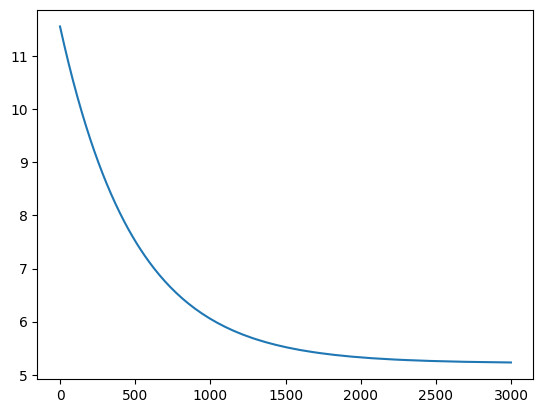

In [ ]:
plt.plot(costArray)

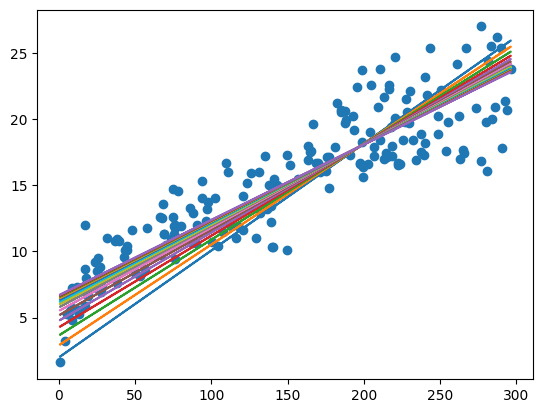

In [ ]:
for i in range(1,len(slopeArray),200):
  plt.plot(x_train,slopeArray[i]*x_train+interceptArray[i])
plt.scatter(x_train,y_train)

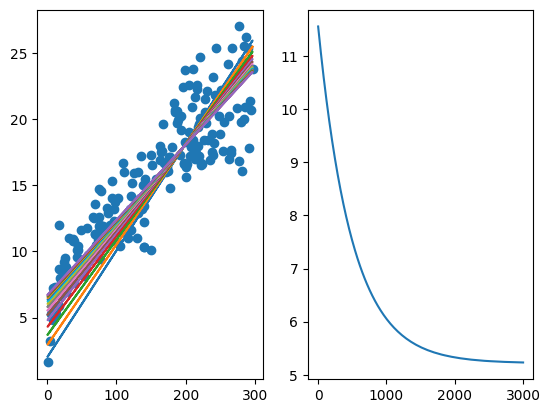

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
initial=slopeArray[0]*x_train+interceptArray[0]
ax1.scatter(x_train,y_train)
for i in range(1,len(slopeArray),200):
  ax1.plot(x_train,slopeArray[i]*x_train+interceptArray[i])
ax2.plot(costArray)

Steps in a **Gradient Descent**



*   Chooses random values of intercept and slope.
*   Draws the line with those random intercept and slope values.
*   Calculates the SSR of that line according to the data.
*   Then moves on to find the next intercept and slope value which will give a smaller SSR.


How does it move on to the next smaller SSR?

*   Calculates the derivative value of the SSR to find the next intercept.
*   Calculates the derivative values of the SSR to find the next slope.
*   Calculate step size which is (derivative*learning rate) for both intercept and slope.
*   Calculate new parameters (intercept and slope) which is old parameter minus step size.
*   Repeat the same process until step sizes become really small.  

If the regression line we have is,

Sales Prediction = Intercept + Slope * TV

If the SSR of our problem is,

SUM(Sales Amount - Sales Prediction)**2

Then

SSR = SUM(Sales Amount - (Intercept + Slope *TV))**2
  
So

dSSR/dintercept = -2*(Sales Amount - (Intercept + Slope *TV))

and

dSSR/dslope = -2*TV*(Sales Amount - (Intercept + Slope *TV))

Step Size (intercept) = (dSSR/dintercept) * learning rate

Step Size (slope) = (dSSR/dslope) * learning rate

learning rate = a small value like .001 which prevents us to take large steps and skip the lowest point of the curve.

Next intercept = Old intercept - Step Size (intercept)

Next slope = Old slope - Step Size (slope)



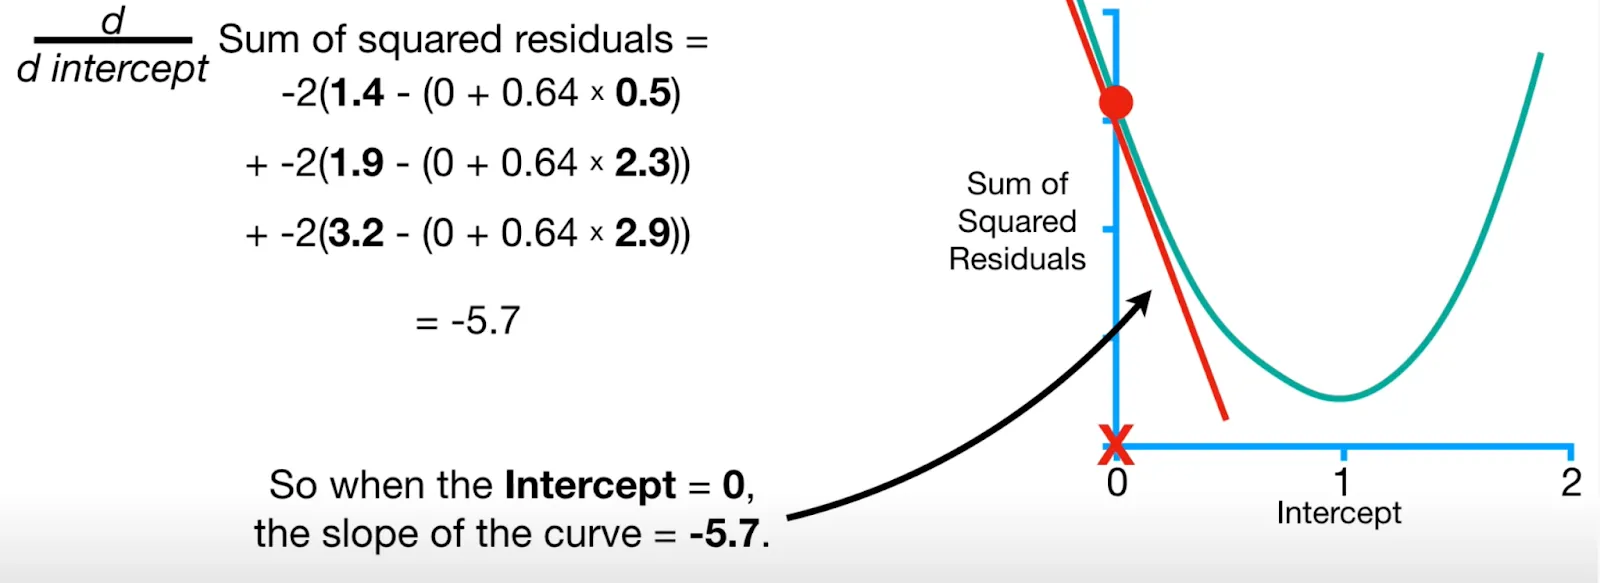

image.png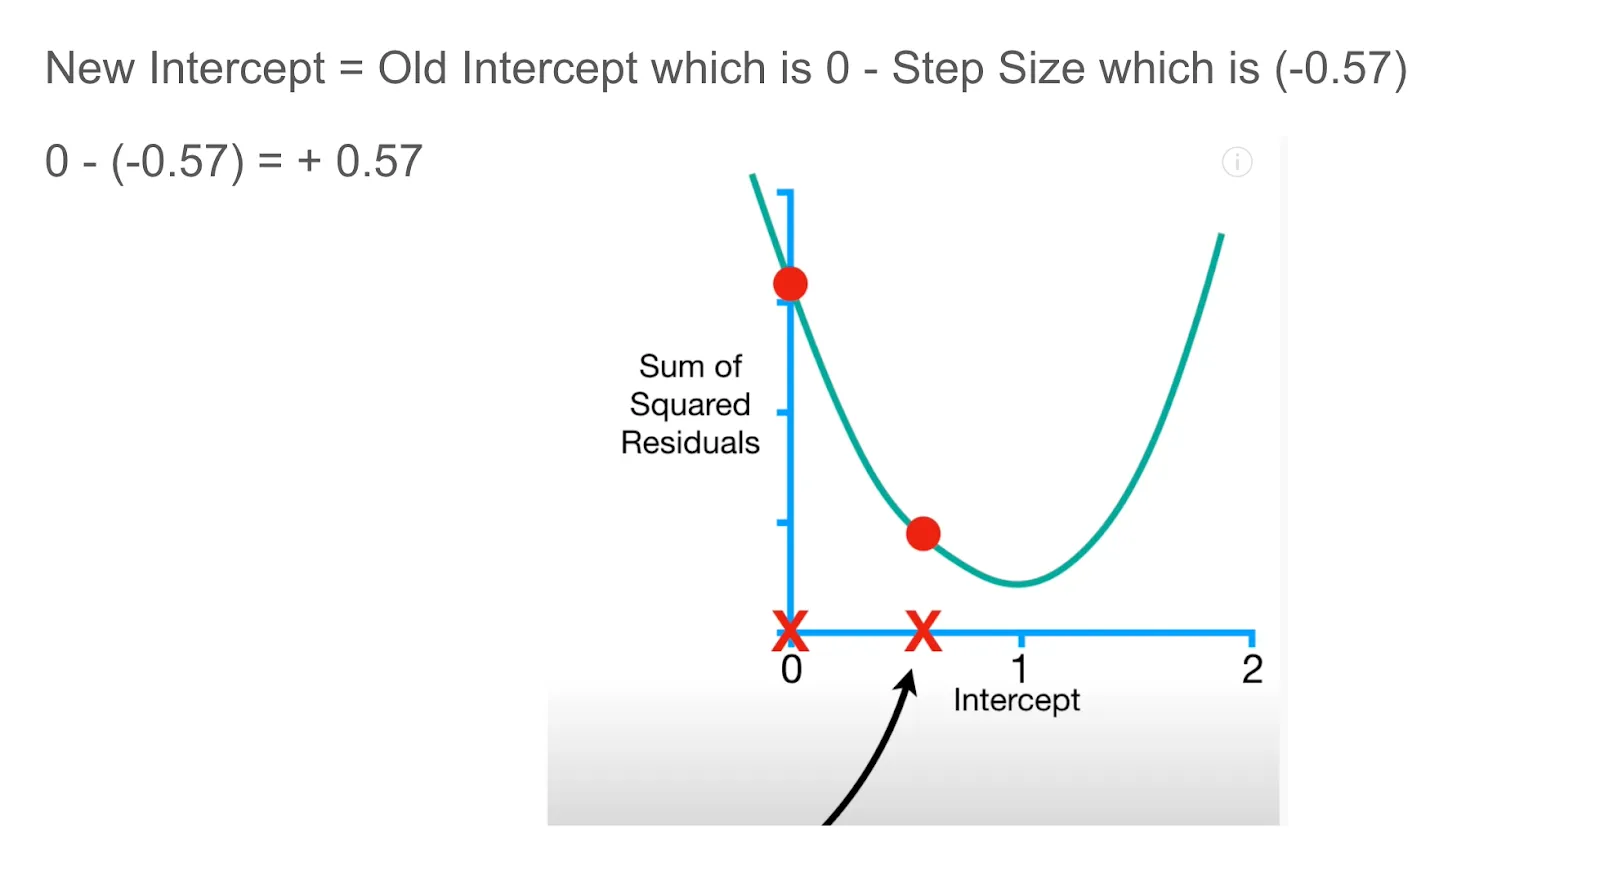

image.png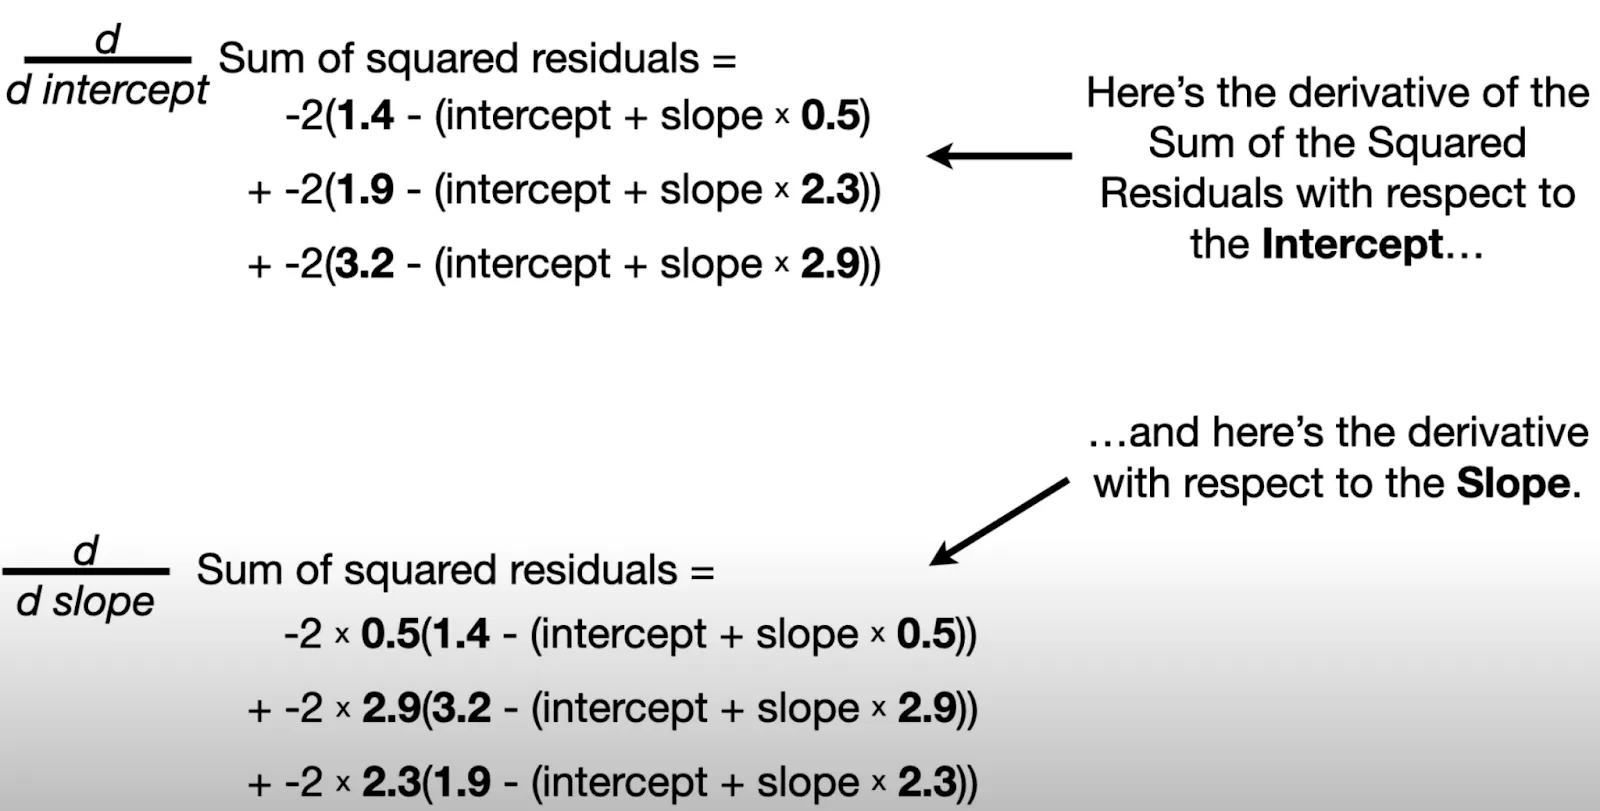

In [ ]:
lineInterceptSSRArray=[]
for i in range(len(interceptArray)):
  lineIntercept=slope*x_train+interceptArray[i]
  lineInterceptSS=(y_train-lineIntercept)**2
  lineInterceptSSR=lineInterceptSS.sum()/len(y_train)
  lineInterceptSSRArray.append(lineInterceptSSR)

Text(0, 0.5, 'SSR')

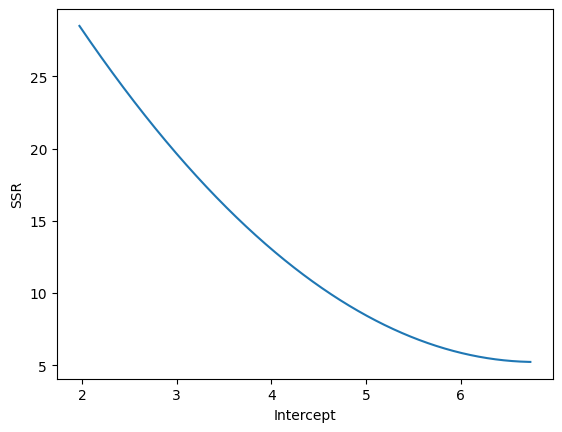

In [ ]:
plt.plot(interceptArray,lineInterceptSSRArray)
plt.xlabel("Intercept")
plt.ylabel("SSR")

In [ ]:
print(interceptArray[0],slopeArray[0],costArray[0])

1.9726388 0.08086711 11.555467


In [ ]:
derivativeIntercept=((-2)*(y_train-slope*x_train-interceptArray[0])).sum()/len(y_train)
derivativeIntercept

-9.647941633820533

In [ ]:
stepSizeIntercept=derivativeIntercept*learningRate
stepSizeIntercept

-9.647941633820533e-05

In [ ]:
newIntercept1=interceptArray[0]-stepSizeIntercept
newIntercept1

1.9727353248600639

In [ ]:
derivativeIntercept=((-2)*(y_train-.057*x_train-newIntercept1)).sum()/len(y_train)
stepSizeIntercept=derivativeIntercept*learningRate
newIntercept2=newIntercept1-stepSizeIntercept
newIntercept2

1.9728308517035666

In [ ]:
model=LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train)
model.score(x_train.values.reshape(-1,1),y_train)

0.8121757029987414

In [ ]:
u=(y_train-pred)**2
v=(y_train-y_train.mean())**2
accuracy=1-(u.sum()/v.sum())
print(accuracy)

0.811656375194505


**What if we had a more complicated model?**



*   What if we had a dataset with 1M rows?
*   What if we had more than thousand parameters?
*   Gradient descent would have taken all of those 1M data in its each iteration.
*   Gradient descent would have to calculate derivatives for each of those parameters.
*   Running gradient descent will be too slow to run.



**Stochastic Gradient Descent (SGD)**



*   Instead of using the whole dataset to move on to the next parameters, SGD will take a single data or a subset of the data to calculate the new parameters in the next iteration.
*   Each iteration will take a random subset of data to optimize the parameters until the step sizes are really small.
*   As there are less data in each iteration, time of the calcuation will reduce but it may take more iterations to find the smallest step size.



**Accuracy Metrics**

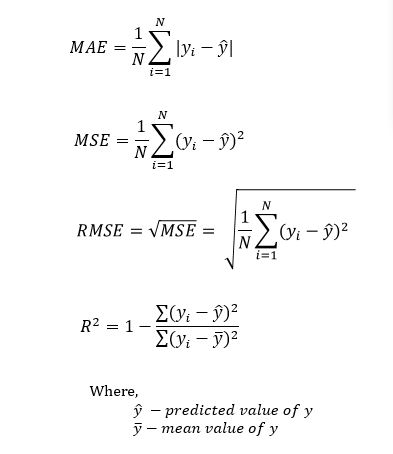


**Linear Regression Model with two independent variables**


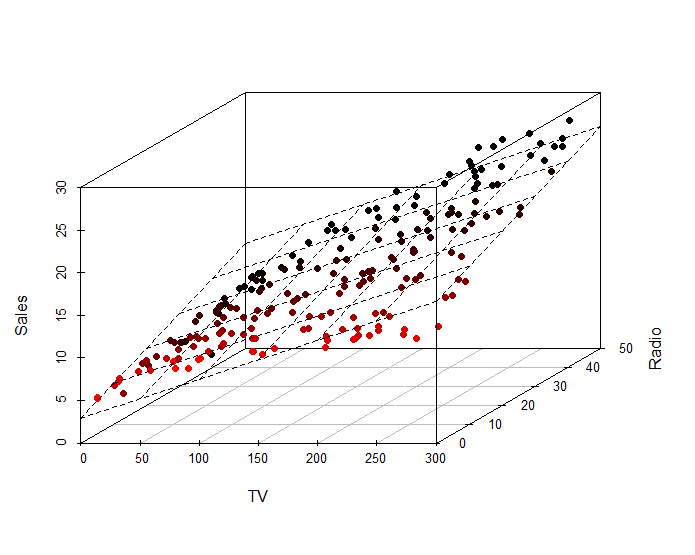

For 2 or more independent variables, instead of a line, a 3D plane will be drawn to predict in a linear regression.

**Polynomial Regression**



*   Not every data serves a linear relationship.
*   Data may have a non-linear relationship.
*   Fitting a straightline to a non-linear relationship will not give us accurate prediction.
*   Instead of Y=mX+B, the equation for the polinomial regression will be Y=mX^2+B.



**Example of a non-linear data**

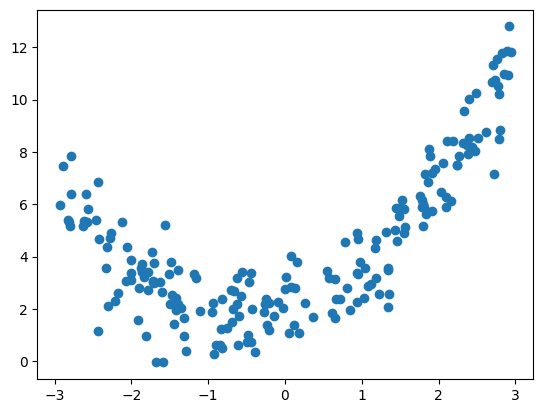

In [ ]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
plt.scatter(X, y)
plt.show()

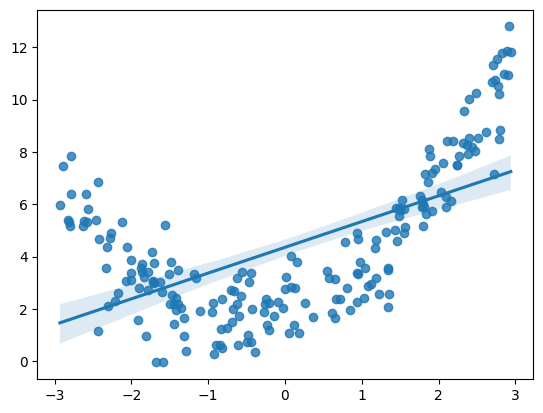

In [ ]:
sns.regplot(x=X, y=y)
plt.show()

**Need higher polinomial values of the independent variable.**

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_trans = poly.fit_transform(X)
polynomial=LinearRegression()
polynomial.fit(x_trans, y)

LinearRegression()

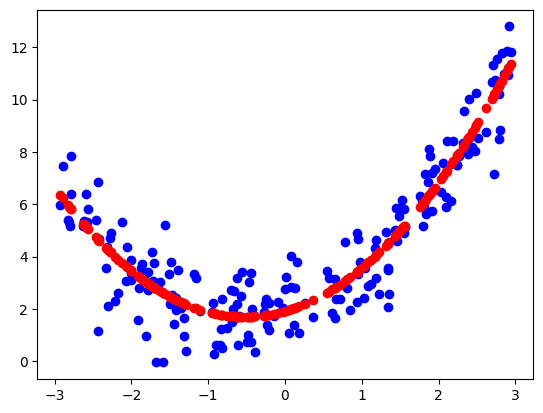

In [ ]:
predPoly=polynomial.predict(x_trans)
plt.scatter(X, y, color='blue')
plt.scatter(X, predPoly, color='red')